In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Table of Contents
* [Lecture 2B - Introduction to Working with Data Frames](#Lecture-2B---Introduction-to-Working-with-Data-Frames)
	* &nbsp;
		* [Content](#Content)
		* [Learning Outcomes](#Learning-Outcomes)
* [DataFrame](#DataFrame)
	* [Creating a Data Frame](#Creating-a-Data-Frame)
		* [Accessing data in a Data Frame](#Accessing-data-in-a-Data-Frame)
			* [By Column](#By-Column)
			* [By Row](#By-Row)
			* [By Row and Column](#By-Row-and-Column)
		* [Filtering Data](#Filtering-Data)
	* [Modifying Data Frames](#Modifying-Data-Frames)
		* [Adding New Columns](#Adding-New-Columns)
	* [Changing values](#Changing-values)
		* [Deleting rows (records) based on conditions](#Deleting-rows-%28records%29-based-on-conditions)
		* [Adding new rows/records](#Adding-new-rows/records)
* [Data Cleaning - Practical Example](#Data-Cleaning---Practical-Example)
	* &nbsp;
		* [Exercise:](#Exercise:)


# Lecture 2B - Introduction to Working with Data Frames

---

### Content

1. What is a Data Frame
2. Creating, Accessing, Filtering data in a Data Frame
3. Modifying values in a Data Frames
4. Deleting entries in a Data Frame
5. Practical Example of Data Cleaning (Data Wrangling)

### Learning Outcomes

At the end of this lecture, you should be able to:

* describe the reasons for using the Data Frame data type  
* create a data frame object from lists and dictionaries 
* access data based on location
* filter data based on conditions
* modify data frames by creating/deleting/change types of columns
* modify data frames by changing values of individual data points
* delete records from data frames based on a condition

In [1]:
from IPython.core.display import HTML
HTML("<iframe src=http://en.wikipedia.org/wiki/Pandas_%28software%29 width=800 height=350></iframe>")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import some extra plotting libraries that pretty-fy the plots 
import seaborn as sns
from pylab import rcParams

rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

In [4]:
# Set some Pandas options as you like
pd.set_option('max_columns', 40)
pd.set_option('max_rows', 20)

In [5]:
#this line enables the plots to be embedded into the notebook
%matplotlib inline

# DataFrame

Inevitably, we want to be able to store, view and manipulate data that is **multivariate**, where for every index there are multiple fields or columns of data, often of **varying data type**.

A `DataFrame` is a **tabular data structure**, encapsulating multiple series like columns in a spreadsheet. Data are stored internally as a 2-dimensional object, but the `DataFrame` allows us to represent and manipulate higher-dimensional data.

With the creation of pandas and in particular the `DataFrame` data structure, Python has gained the same power as the statistical software **R** and combined with the Numpy package, Python can now also do all that **MATLAB** can do, with the added advantage that Python is a general purpose language that can be used for any type of programming, while MATLAB and R are domain specific languages only.

Before creating our first Data Frame object to represent a tabular data set, let us first clarify what the characteristics of a tabular dataset might look like. 

Each row will represent a single data point. There are going to be multiple columns in the dataset. Each column will hold an additional piece of information that describes some characteristic of a particular data point. Different disciplines have different names for the column component and this can unfortunately get confusing. The most common of these are: features, (independent) variables or attributes. Computer scientists prefer the term *features*, so this is what will mostly use here.

In the example below, there is an expanded version of the population dataset seen in the previous illustrations, that includes a feature called 'YEAR'. 

**Discussion exercise**: Given Python's data structures seen in previous examples, consider how they can be used to store the above data? Discuss your options with a colleague working with you.

An intuitive approach would be to store each of the column values in a data structure such as a list and give it a suitable name. 

In [6]:
nation = ['New Zealand', 'Australia', 'Cook Islands', 'Solomon Islands', 'New Zealand', 'Australia', 'Cook Islands', 'Solomon Islands']
population = [3778000, 19138000, 20000, 447000, 4433000, 22680000, 10900, 549598]
year = [2000, 2000, 2000, 2000, 2014, 2014, 2014, 2014]



In [7]:
national_populations = {'population': population,
                        'year': year,
                        'nation':nation}
national_populations


{'population': [3778000,
  19138000,
  20000,
  447000,
  4433000,
  22680000,
  10900,
  549598],
 'year': [2000, 2000, 2000, 2000, 2014, 2014, 2014, 2014],
 'nation': ['New Zealand',
  'Australia',
  'Cook Islands',
  'Solomon Islands',
  'New Zealand',
  'Australia',
  'Cook Islands',
  'Solomon Islands']}

**Exercise**: Assign the values below to appropriately named variables for the next two features.


We now have three lists. One list for each of the feature values.

What we now need to do is to combine the three lists into a single data structure that will store all the values.

That data structure is a dictionary.

**Exercise**: Create a dictionary called *national_populations* from the above lists, where each of the keys, corresponds to the name of the features, and is associated with the appropriate list.

In [ ]:
national_populations = 

With all the data stored inside the dictionary object, we can now proceed to create the Data Frame object, which offers us much more functionality, efficiency and expressive power.

## Creating a Data Frame

The DataFrame can be created by placing a dictionary object into the DataFrame constructor, which is denoted by the parentheses.

In [8]:
data = pd.DataFrame(national_populations)
data

,population,year,nation
0,3778000,2000,New Zealand
1,19138000,2000,Australia
2,20000,2000,Cook Islands
3,447000,2000,Solomon Islands
4,4433000,2014,New Zealand
5,22680000,2014,Australia
6,10900,2014,Cook Islands
7,549598,2014,Solomon Islands


Data in a `DataFrame` can also be plotted in a similar fashion as with a `Series` object. The index becomes the x-axis. The y-axis is can be selected using the '.' operator:

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

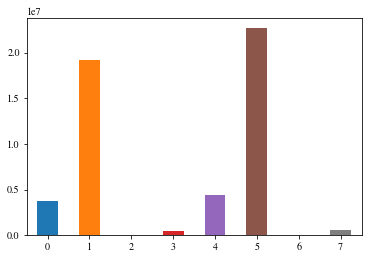

In [11]:
data.population.plot(kind='bar')
plt.xticks(rotation=0)

Notice the `DataFrame` is sorted by column name. We can change the order by indexing them in the order we desire by passing in a list of column names:

In [12]:
data

,population,year,nation
0,3778000,2000,New Zealand
1,19138000,2000,Australia
2,20000,2000,Cook Islands
3,447000,2000,Solomon Islands
4,4433000,2014,New Zealand
5,22680000,2014,Australia
6,10900,2014,Cook Islands
7,549598,2014,Solomon Islands


In [13]:
data[['nation','year','population']]

,nation,year,population
0,New Zealand,2000,3778000
1,Australia,2000,19138000
2,Cook Islands,2000,20000
3,Solomon Islands,2000,447000
4,New Zealand,2014,4433000
5,Australia,2014,22680000
6,Cook Islands,2014,10900
7,Solomon Islands,2014,549598


A `DataFrame` has a second index, representing the columns:

In [ ]:
data.columns

In [ ]:
list(data.index)

### Accessing data in a Data Frame

#### By Column

If we wish to access columns, we can do so either by dictionary-like indexing or by feature name:

In [ ]:
data['population']

In [ ]:
data.population

**Exercise**: check what type is returned when you call data.population and access it as a feature

**Exercise**: check what type is returned when you access [['population']] by passing it as a list to data:

#### By Row

Notice in the above example how this differs in comparison with `Series`, where dict-like indexing retrieved a particular element (row). If we want to access a row in a `DataFrame`, we index its location attribute using `loc` or `iloc` depending on if we are using the index label name or explicit index position.

In [ ]:
data.loc[3]

In [ ]:
data

We can do more sophisticated selection of data using slicing:

In [ ]:
data.loc[4:6]

#### By Row and Column

In [ ]:
data.loc[4:6,['year']]

In [ ]:
data

In [ ]:
data.loc[4:6, 'year':'nation']

In [ ]:
data.iloc[4:6,[0,2]]

**Exercise:** Select and display only the first 4 rows of *data* and show only the 'nation' and 'population' features.

There are a number of different ways to index dataframes. Refer to http://pandas.pydata.org/pandas-docs/stable/indexing.html#different-choices-for-indexing for an in depth description of options and performance profiles.

Below is an example of performances for different ways of accessing dataframes that are highly relevant when the datasets become large:  

In [ ]:
%timeit data.loc[0,'nation']

In [ ]:
%timeit data.iloc[0,0]

In [ ]:
%timeit data.iat[0,0]

### Filtering Data

Data Frames provide the functionality to select data based on specific conditions. This is called 'filtering'. 

There are a number of different ways of performing filtering.

In [ ]:
data[data.population > 1000000]

The most common is using a second set of square brackets, which contain the actual condition to be satisfied:

In [ ]:
data['population'][data['nation'] == 'New Zealand']

Often we need to perform filtering on multiple conditions.

Below is an example of displaying the nation name and population of a country that has more than 1 million population on data after year 2000. 

In [ ]:
data[['nation','population']][(data['population'] > 1000000) & (data['year'] > 2000)]

Notice that the multiple conditions must be enclosed within the parentheses. The symbol '&' signifies that both sides of the equations must be satisfied. Alternatively, the symbol '|' signifying or, can be used when either one of the conditions must be satisfied. 

**Exercise**: Write a filter that display the name and the year of countries which had populations greater than 2 million and smaller 20 million.

Pandas is under continual development and improvement. The new and experimental functionality which simplifies the filtering is using the keyword *query*

In [ ]:
data[['year','nation']].query('year > 2000')

In [ ]:
data[['year','nation']].query('year > 2000 and nation in ["Australia", "New Zealand"]')

In [ ]:
data[['year','nation']].query('index > 4')

Conditional filtering on data frames can also be performed using the `where` construct, which preserves the 'shape' of the data and lists values that do not meet the criterion as a NaN:

In [9]:
data['population'].where(data['nation'] == 'New Zealand')

0    3778000.0
1          NaN
2          NaN
3          NaN
4    4433000.0
5          NaN
6          NaN
7          NaN
Name: population, dtype: float64

## Modifying Data Frames

### Adding New Columns

New columns can be created as follows:

In [ ]:
data['region'] = ''
data

Values can be assigned to new columns directly:

In [ ]:
data['region'] = 'Oceania'
data

We can create new columns automatically which are in some way derivatives of existing data


In [ ]:
data['risingSeaLevelRisk'] =  data['nation'].str.contains("Islands")
data

We can also derive new columns by applying a math operation to existing columns

**Exercise**: Write code that creates a new column (call it sqrtPopulation) which holds the values of the square root of the population. The function can be accessed through np.sqrt()

A frequent task performed in data cleaning and analysis is modifying data types for columns. The below code shows how this can be done.

In [ ]:
data['sqrtPopulation'] = data['sqrtPopulation'].astype(int)
data

In [ ]:
data

Columns can be deleted as follows

In [ ]:
del data['sqrtPopulation']
data

## Changing values

We can modify individual values in a data frame by indexing the location in a data frame using the ix attribute.

In [ ]:
data

In order to change the risingSeaLevelRisk for NZ's first entry:

In [ ]:
data.iloc[0,4] = True
data

**Exercise**: Change the value for NZ's second risingSeaLevelRisk value from False to True

One of the most time consuming tasks is performing data cleaning, where the task frequently involves changing the values of strings in columns.

The following code will change the name of 'New Zealand' to 'New Zealand (Aotearoa)'

In [ ]:
data['nation'] = data['nation'].str.replace('New Zealand', 'New Zealand (Aotearoa)')
data

**Exercise**: Write code that changes 'Cook Islands' to 'Cook Islands (NZ Protectorate)'

Its important to note that the Series returned when a DataFrame is indexed is merely a **view** on the DataFrame, and not a copy of the data itself. So you must be cautious when manipulating this data:

In [ ]:
vals = data.population
vals

In [ ]:
vals[5] = 0
vals

In [ ]:
data

In [ ]:
vals = data.population.copy()
vals[5] = 1000
data

We can create or modify columns by assignment:

In [ ]:
data.population[3] = 1
data

In [ ]:
data.population[3] = 447000
data

### Deleting rows (records) based on conditions

Previous examples demonstrated how to remove entire columns from a data frame and how to modify individual data points in records. 

Frequently we would like to remove select rows that meet a given requirement.

In the below example we will delete all rows where the value of population is bellow 1 million. 

There are 2 steps we must perform in order to do this. We first identify all the rows that we want removed and create another data frame from this where the index value is preserved.

In [ ]:
indexOfRowsToDrop = data[data.population < 1000000]
indexOfRowsToDrop

Next, we call the *drop()* method on the target data frame. The drop method requires a list of indices that need to be dropped form a data frame. We additionally indicate that the drop procedure should permanently delete the data by specifying inplace=True. 

In [ ]:
data.drop(indexOfRowsToDrop.index, inplace=False)


In [ ]:
data

**Exercise**: Write code that deletes all records that are from year 2014 and have population greater than 4 million.

### Adding new rows/records

Appending new rows (records) in order to achieve enlargement of a data frame can be accomplished using the *.ix[]* (or .loc[]) attribute seen earlier, followed by the square brackets which specify the location of the insertion.

In [ ]:
data

In [ ]:
data.loc[8] = ["Germany", 85000000, 2014, 'Europe', False]
data

In [ ]:
data.loc[10] = ["Germany", 85000000, 2014, 'Europe', False]
data

**Exercise**: Write code that inserts a record for France (population 66m).

# Data Cleaning - Practical Example

Go to http://inflationdata.com/Inflation/Inflation_Rate/Historical_Oil_Prices_Table.asp 

Highlight and copy the data in the table found on this web site, from the column name 'Year', down to the end of the last record.

One of the amazing features that Pandas has built in, is that we can directly import this into a data frame.

In [ ]:
oil_price = pd.read_clipboard()
oil_price

In order to fully appreciate the trends, we need to plot this data. plt.plot() allows us to easily do this. It requires that we pass into this method numerical values for the x-axis, separated by the comma and followed by numerical values for the y-axis. 

However, this is what happens when we try this.

In [ ]:
oil_price.columns

In [ ]:
plt.plot(oil_price['Year '], oil_price['Inflation Adjusted Price'])

 **Exercise**: Write code that finds out what data type the two columns are that we are trying to plot.

Due to the presence of the '$' symbol. pandas has interpreted this column as a string. 

 **Exercise**: Write code that removes the '$' symbol from all he entries and converts the column into a float. 


 **Exercise**:Write code that generates two plots. One for the Inflation Adjusted Price of oil per year and the other for the Nominal Price of oil per year

### Exercise: 

Once you have plotted the data, save the dataframe as a .csv file called 'oil_prices.csv'.